# Introduction to Time Series Analysis

## Introduction

In this section we will cover the following topics:

- What is a time series, and when do we use it.
- The main components of a time series.
- Time series decomposition.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from scipy.fft import fft
np.random.seed(42)  # for reproducibility

### What is a time series?

- A time series is a sequence of data points organized in time order.
- Usually, the time signal is sampled at equally spaced points in time.
- These can be represented as the sequence of the sampled values.
- We refer to this setting as *discrete* time.

![Time series example](media/TimeSeriesVisual.gif)

### What data are represented as time series?

- Time series have a plethora of applications such as modeling finance, activity, behaviour, and so on.

[*********************100%***********************]  1 of 1 completed

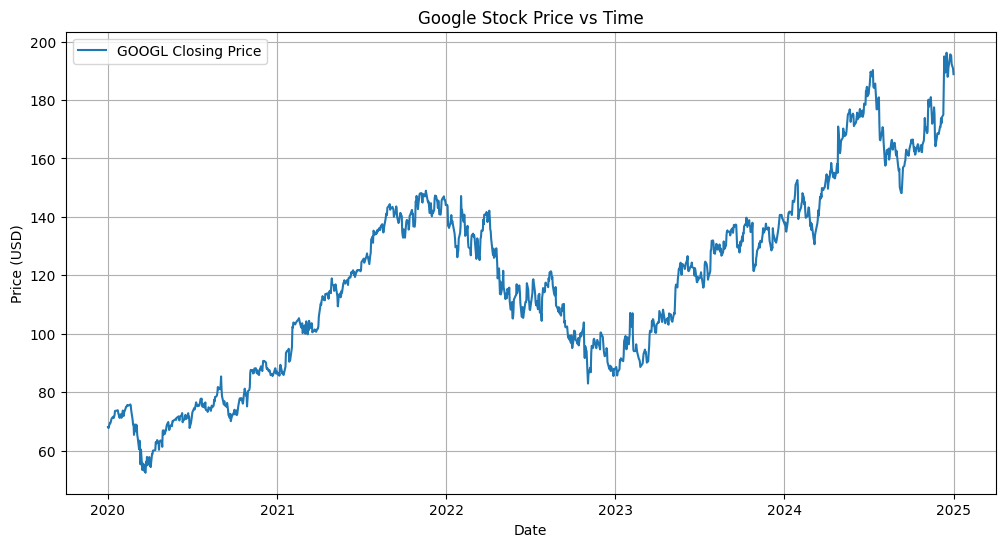

In [43]:
data = yf.download("GOOGL", start="2020-01-01", end="2025-01-01", auto_adjust=True)

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label="GOOGL Closing Price")
plt.title("Google Stock Price vs Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

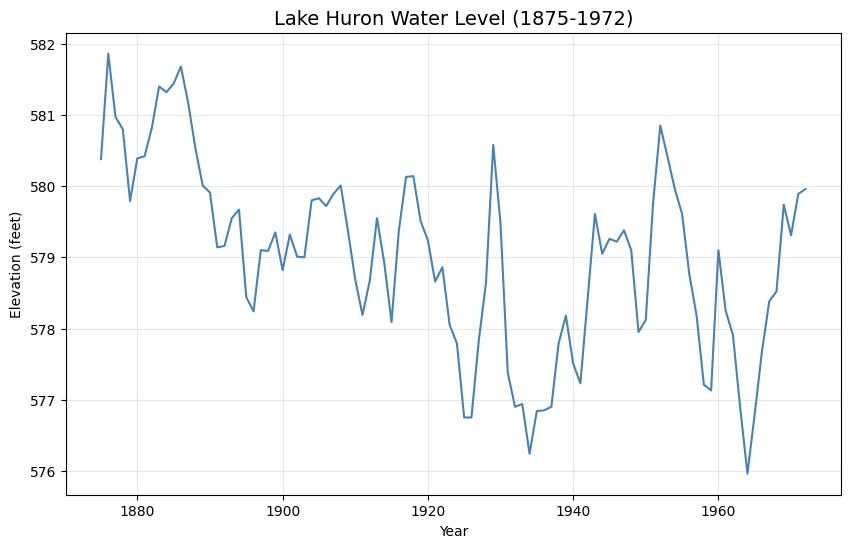

In [44]:
data = sm.datasets.get_rdataset("LakeHuron", "datasets")
lake_huron = data.data['value']
years = data.data['time']

plt.figure(figsize=(10, 6))
plt.plot(years, lake_huron, color='steelblue', linewidth=1.5)
plt.title('Lake Huron Water Level (1875-1972)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Elevation (feet)')
plt.grid(alpha=0.3)
plt.show()

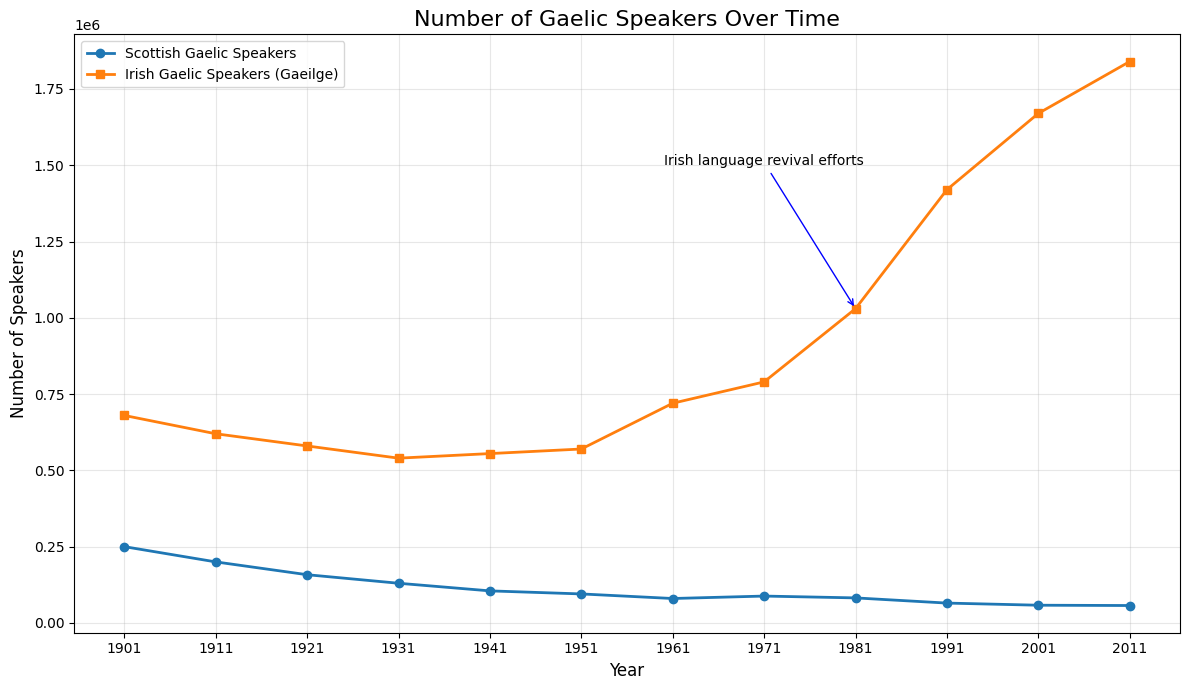

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from Scottish and Irish Census
data = {
    'Year': [1901, 1911, 1921, 1931, 1941, 1951, 1961, 1971, 1981, 1991, 2001, 2011],
    'Scottish_Gaelic_Speakers': [250000, 200000, 158000, 130000, 105000, 95000, 80000, 88000, 82000, 65000, 58000, 57000],
    'Irish_Gaelic_Speakers': [680000, 620000, 580000, 540000, 555000, 570000, 720000, 790000, 1030000, 1420000, 1670000, 1840000]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 7))

plt.plot(df['Year'], df['Scottish_Gaelic_Speakers'], 
         marker='o', linewidth=2, label='Scottish Gaelic Speakers')

plt.plot(df['Year'], df['Irish_Gaelic_Speakers'], 
         marker='s', linewidth=2, label='Irish Gaelic Speakers (Gaeilge)')

plt.title('Number of Gaelic Speakers Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Speakers', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(df['Year'])

plt.annotate('Irish language revival efforts', 
             xy=(1981, 1030000), xytext=(1960, 1500000),
             arrowprops=dict(arrowstyle='->', color='blue'),
             fontsize=10)

plt.tight_layout()
plt.show()

### Time series analysis

The main objectives of time series analysis are:
1. To find a **model** that adequately explains the **dependence** observed in a time series.
2. To **predict** or **forecast** future values of the time series based on those we have already observed.
3. To **adjust** our observed data into a form more suited for answering the question of interest.

### Applications

Time series analysis is applied in many real world applications, including
- Economic forecasting
- Stock market analysis
- Demand planning and forecasting
- Anomaly detection
- … And much more

**Economic Forecasting**

- Time series analysis is used in macroeconomic predictions.
- World Trade Organization does time series forecasting to predict levels of international trade.
- Federal Reserve uses time series forecasts of the economy to set interest rates [[source](https://www.federalreserve.gov/pubs/feds/2009/200910/200910pap.pdf)].

**Demand forecasting**

- Time series analysis is used to predict demand at different levels of granularity.
- Amazon and other e commerce companies use time series modeling to predict demand at a product geography level [[source](https://www.theverge.com/2014/1/18/5320636/amazon-plans-to-ship-your-packages-before-you-even-buy-them)].
- Helps meet customer needs (fast shipping) and reduce inventory waste

**Anomaly detection**

- Used to detect anomalous behaviors in the underlying system by looking at unusual patterns in the time series.
- Widely used in manufacturing to detect defects and target preventive maintenance
- With new IoT devices, anomaly detection is being used in machinery heavy industries, such as petroleum and gas [[source](https://arxiv.org/abs/1607.02480)].

## Time series components

- A time series is often assumed to be composed of three components:
    - *Trend*: The trend is the direction of the data.
    - *Seasonality*: The seasonal component is the part constantly repeats itself in time.
    - *Noise*: The component that is neither Trend nor Seasonality.

### Trend

- Kendall writes that "the essential idea of trend is that it shall be smooth."
- Trend captures the general direction of the time series.
- Trend can be increasing, decreasing, or constant.
- It can increase/decrease in different ways over time (linearly, exponentially, etc).
- When the trend is removed, we obtain a **detrended** series.

[*********************100%***********************]  1 of 1 completed


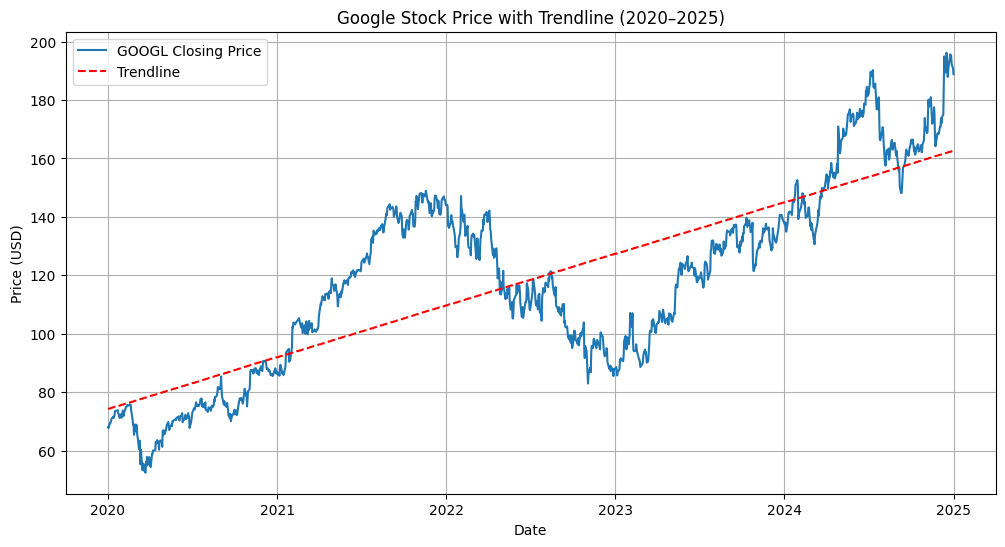

In [46]:
data = yf.download("GOOGL", start="2020-01-01", end="2025-01-01", auto_adjust=True)

y = data['Close'].dropna().to_numpy().flatten()
x = np.arange(len(y)) 

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.figure(figsize=(12,6))
plt.plot(data.index[:len(y)], y, label="GOOGL Closing Price")
plt.plot(data.index[:len(y)], p(x), "r--", label="Trendline")
plt.title("Google Stock Price with Trendline (2020–2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

- Let's create a trend from scratch to understand how it's behaviour.

In [47]:
time = np.arange(252 * 5) # days the market is open * 5
trend = time * 0.07 + 75

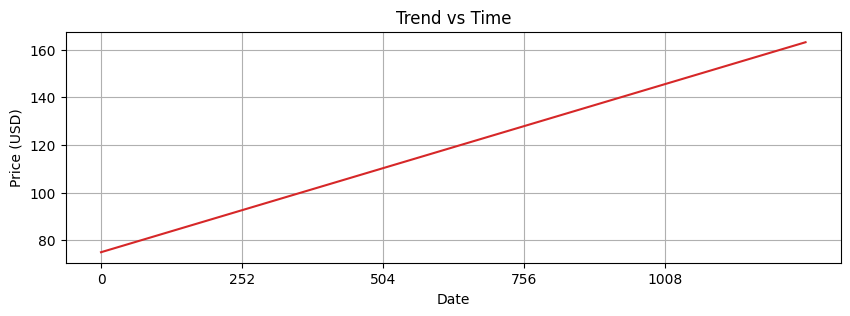

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, trend, color='tab:red')
ax.set_xlabel("Date")
ax.set_ylabel("Price (USD)")
year_ticks = np.arange(0, len(time), 252)
ax.set_xticks(year_ticks)
ax.grid(True)
plt.title("Trend vs Time");

### Seasonality

- Periodic fluctuations in time series data that occur at regular intervals due to seasonal factors.
- It is characterized by consistent and predictable patterns over a specific period (e.g., daily, monthly, quarterly, yearly).
- When we remove a seasonal component we say that we **deseasonalize** the series.

It can be driven by many factors, and there can be multiple causes of seasonal behaviour.
- Naturally occurring events such as weather fluctuations caused by time of year.
- Business or administrative procedures, such as start and end of a school year.
- Social or cultural behavior, e.g., holidays or religious observances.

In [49]:
seasonal = 0.1 + np.sin( time * 0.024 - 0.44 ) * -4.12

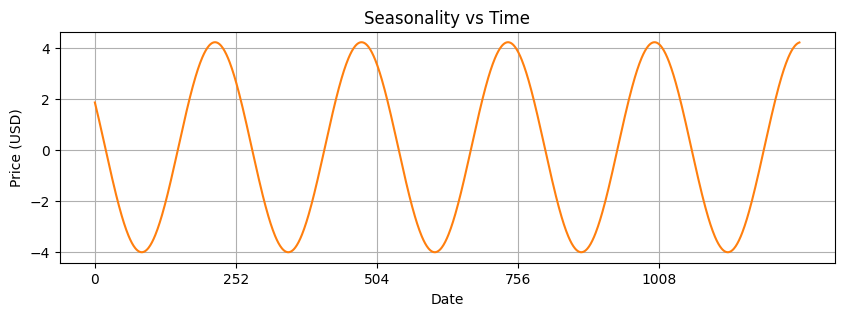

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, seasonal, color='tab:orange')
ax.set_xlabel("Date")
ax.set_ylabel("Price (USD)")
year_ticks = np.arange(0, len(time), 252)
ax.set_xticks(year_ticks)
ax.grid(True)
plt.title("Seasonality vs Time");

### Noise

- Noise is the random fluctuations left over after trend and seasonality are removed from the original time series.
- One should not see a trend or seasonal pattern in the residuals.
- They represent short term, rather unpredictable fluctuations.

In [51]:
noise = np.random.normal(loc=0.0, scale=1, size=len(time))

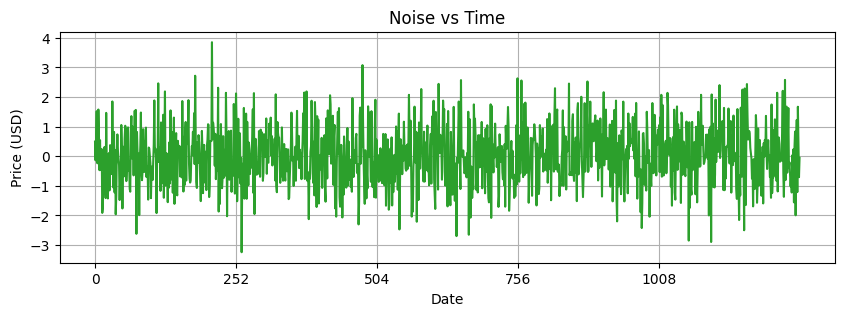

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, noise, color='tab:green')
ax.set_xlabel("Date")
ax.set_ylabel("Price (USD)")
year_ticks = np.arange(0, len(time), 252)
ax.set_xticks(year_ticks)
ax.grid(True)
plt.title("Noise vs Time");

---

## Decomposition Models

- Time series can be decomposed with the following models:
  - Additive decomposition
  - Multiplicative decomposition

### Additive model

- Additive models assume that the observed time series is the sum of its components: 

$$X(t) = T(t) + S(t) + N(t)$$  

- where
    - $X(t)$ is the time series   
    - $T(t)$ is the trend  
    - $S(t)$ is the seasonality  
    - $N(t)$ is the noise  
- Additive models are used when the magnitudes of the seasonal and residual values do not depend on the level of the trend.

In [53]:
additive = trend + seasonal + noise

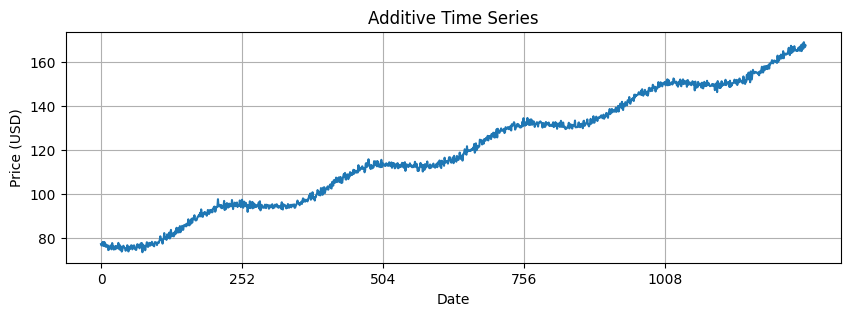

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, additive, 'tab:blue')
ax.set_xlabel("Date")
ax.set_ylabel("Price (USD)")
year_ticks = np.arange(0, len(time), 252)
ax.set_xticks(year_ticks)
ax.grid(True)
plt.title("Additive Time Series");

### Multiplicative Model

- Assumes that the observed time series is the product of its components: 

$$X(t) = T(t) \cdot S(t) \cdot R(t)$$

- It is possible to transform a multiplicative model to an additive one by applying a log transformation: 

$$\log \left( T(t) \cdot S(t) \cdot R(t) \right) = \log(T(t)) + \log(S(t)) + \log(R(t))$$

- Multiplicative models are used when the magnitudes of seasonal and residual values depends on trend.

In [55]:
multiplicative = trend * seasonal # no noise to make the trend more pronounced

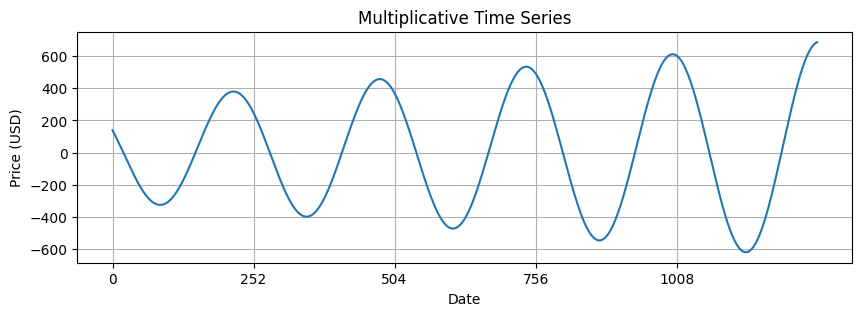

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, multiplicative, 'tab:blue')
ax.set_xlabel("Date")
ax.set_ylabel("Price (USD)")
plt.title("Multiplicative Time Series")
year_ticks = np.arange(0, len(time), 252)
ax.set_xticks(year_ticks)
ax.grid(True)

For this workshop, we'll be focusing more on the additive model.

---

## Time Series Decomposition

- Now let's go the other way. 
- We have additive and multiplicative data. 
- Let's decompose them into their three components. 

- A very simple, yet often useful, approach is to estimate a *linear* trend.
- A *detrended* time series is obtained by subtracting the linear trend from the data.
- The linear trend is computed as a 1st order polynomial.

In [57]:
slope, intercept = np.polyfit(np.arange(len(additive)), additive, 1) # estimate line coefficient
trend = np.arange(len(additive)) * slope + intercept                 # linear trend
detrended = additive - trend                                         # remove the trend

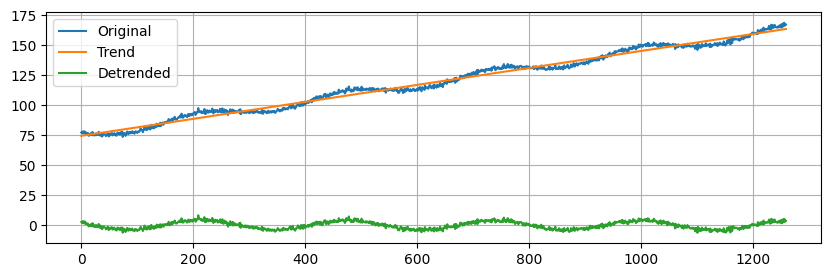

In [58]:
plt.figure(figsize=(10, 3))
plt.plot(additive, label='Original')
plt.plot(trend, label='Trend')
plt.plot(detrended, label='Detrended')
plt.grid()
plt.legend();

- Next, we will use `seasonal_decompose` (more information [here](http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)) to isolate the main time series components.
- This is a simple method that requires us to specify the type of model (additive or multiplicative) and the main period.

### Additive Decomposition

- We need to specify an integer that represents the main seasonality of the data.
- Since the market is open for trading on 252 business days, we'll use that as our period.

In [59]:
additive_decomposition = seasonal_decompose(x=additive, model='additive', period=252)

In [60]:
# Utility function to make the plots
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(7, 5))
    axes[0].plot(original, label='Original')
    axes[0].legend(loc='upper left')
    axes[1].plot(decomposition.trend, label='Trend')
    axes[1].legend(loc='upper left')
    axes[2].plot(decomposition.seasonal, label='Seasonality')
    axes[2].legend(loc='upper left')
    axes[3].plot(decomposition.resid, label='Residuals')
    axes[3].legend(loc='upper left')
    plt.show()

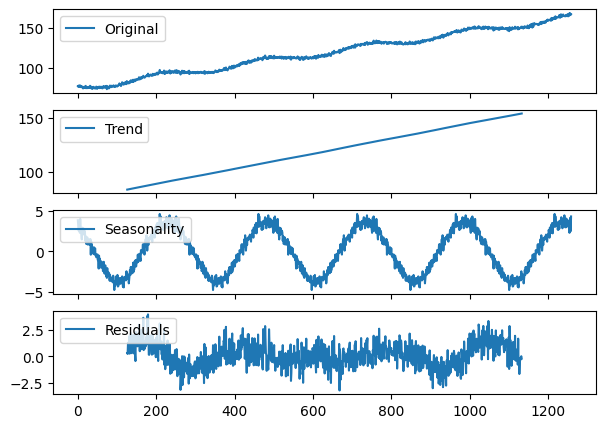

In [61]:
seas_decomp_plots(additive, additive_decomposition)

### Locally estimated scatterplot smoothing (LOESS)
- Next, we try a second method called `STL` (Seasonal and Trend decomposition using LOESS).

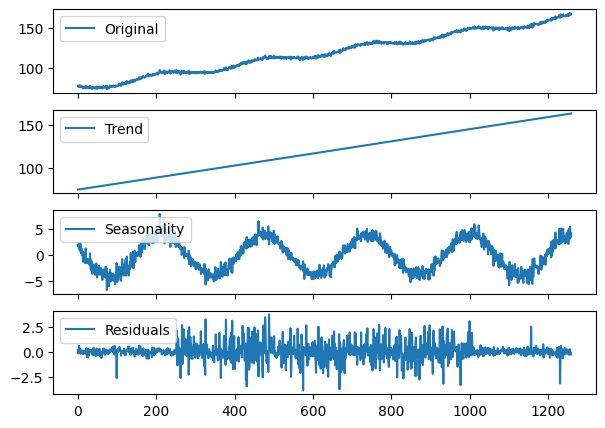

In [62]:
stl_decomposition = STL(endog=additive, period=252, robust=True).fit()
seas_decomp_plots(additive, stl_decomposition)

### Which method to use?

Use ``seasonal_decompose`` when:

- Your time series data has a clear and stable seasonal pattern and trend.
- You prefer a simpler model with fewer parameters to adjust.
- The seasonal amplitude is constant over time (suggesting an additive model).

Use ``STL`` when:

- Your time series exhibits complex seasonality that may change over time.
- You need to handle outliers effectively without them distorting the trend and seasonal components.
- You are dealing with non-linear trends and seasonality, and you need more control over the decomposition process.

---

### Identifying the dominant period

- ``seasonal_decompose`` expects the dominant period as a parameter. 
- In our example, the ``seasonal`` component was easy to figure out based on the behaviour of the market, but we won't always be so lucky
- How can we find it?

- You can use one of the following techniques:
    - Plot the data and try to figure out after how many steps the cycle repeats.
    - Use the Fast Fourier Transform on a detrended signal.

- For now, you can use the following function to compute the dominant period in the data.

In [63]:
def fft_analysis(signal):
    
    # Linear detrending
    slope, intercept = np.polyfit(np.arange(len(signal)), signal, 1)
    trend = np.arange(len(signal)) * slope + intercept 
    detrended = signal - trend 
    
    fft_values = fft(detrended)
    frequencies = np.fft.fftfreq(len(fft_values))

    # Remove negative frequencies and sort
    positive_frequencies = frequencies[frequencies > 0]
    magnitudes = np.abs(fft_values)[frequencies > 0]

    # Identify dominant frequency
    dominant_frequency = positive_frequencies[np.argmax(magnitudes)]
    print(f"Dominant Frequency: {dominant_frequency:.3f}")

    # Convert frequency to period (e.g., days, weeks, months, etc.)
    dominant_period = 1 / dominant_frequency
    print(f"Dominant Period: {dominant_period:.2f} time units")
    
    return dominant_period, positive_frequencies, magnitudes

In [64]:
period, freqs, magnitudes = fft_analysis(seasonal)

Dominant Frequency: 0.004
Dominant Period: 252.00 time units


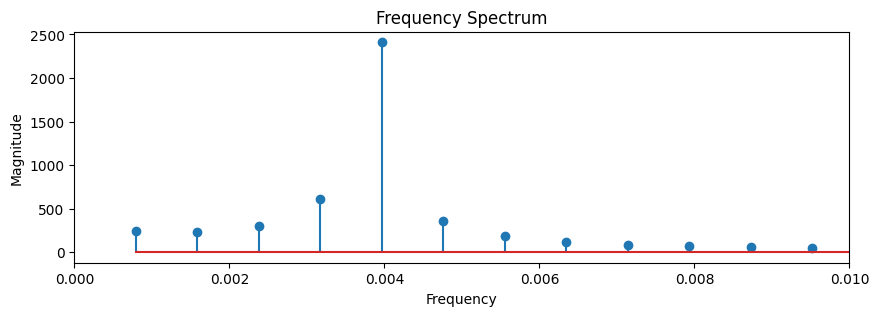

In [65]:
# Plotting the spectrum
plt.figure(figsize=(10, 3))
plt.stem(freqs, magnitudes)
plt.title('Frequency Spectrum')
plt.xlim(0.0, 0.01) # can be moved around
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

In [66]:
hourly_seasonal = 12 + np.sin(2*np.pi*time/24)

In [67]:
fft_analysis(hourly_seasonal);

Dominant Frequency: 0.041
Dominant Period: 24.23 time units


---

## Summary

In this section we covered:
- The definition of a time series and examples of time series from the real world.
- The definition of time series analysis and examples of its application in different fields.
- A practical understanding of the three components of time series data.
- The additive and multiplicative models.
- Standard approaches to decompose a time series in its constituent parts.

---

### Exercises

#### Exercise 1:

In [68]:
lake_huron = sm.datasets.get_rdataset("LakeHuron", "datasets").data["value"]

Perform seasonal decompositon using `STL` and `Seasonal Decompositon`, justify your choice in period (either using rational or FFT). Comment on the overall trend in the data.

#### Exercise 2:

In [69]:
passengers = sm.datasets.get_rdataset("AirPassengers", "datasets").data["value"].values

Use FFT to determine the dominant period in the data, use this to seasonally decompose the data. Once you extract the seasonality, comment on the seasonal ridership patterns.